# Project: Wrangling and Analyze Data

The main objectives of this project is to wrangle (clean) and analyze twitter data. I deal with some messy data, clean it, then plot some visualizations of the data to analyze it. 

## Data Gathering
I import three types of data, a .csv file (comma separated), a .tsv file (tab separated), and a .json file (JavaScript object notation).

The .csv file is of tweets from twitter (now X), which post pictures of dogs and rate them on a scale of 10

The .tsv is data from an algorithm that predictions the dogs breed

The .json file provides additional information about each posts number of retweets, favorites, etc.

In [1]:
# import libraries and set aliases
import pandas as pd
import os
import requests
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir(r"C:\Users\Kevin.Wood\OneDrive - FDA\Desktop\Udacity")
#os.chdir(r"/Users/robinsilvester/downloads")

In [2]:
# load in the csv file, which contains the actual tweet
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# use the requests library to download and open the tsv 
tsv_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(tsv_url)
url_content = req.content
tsv_file = open('downloaded.tsv', 'wb')

tsv_file.write(url_content)
tsv_file.close()

image_prediction = pd.read_csv('downloaded.tsv', sep='\t')

In [4]:
# create an empty list to build it out with the json file
twitter_list = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet-json.txt', 'r'):
    twitter_api_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_api_data['id_str'],
                        'retweet_count': twitter_api_data['retweet_count'],
                        'favorite_count': twitter_api_data['favorite_count'],
                        'followers_count': twitter_api_data['user']['followers_count']})
# Convert the list of dictionaries to a pandas DataFrame
twitter_api_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

## Assessing Data
In this section, I address quality and tidiness issues. 
Quality issues are when the data has missing values, duplicates, or incorrect data.
Tidiness issues are specific structure issues (columns, rows, or table)



### I investigate the twitter archive data below

In [5]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


By visual inspection, it seems that for 'doggo', 'floofer', 'pupper' and 'puppo' columns most observations have value of 'None'. <br>
The dataframe can be made **tidy** by combining these four columns into one column.

In [6]:
twitter_archive_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [7]:
twitter_archive_enhanced.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [8]:
twitter_archive_enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [9]:
twitter_archive_enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

I check if the special dog classifications are mutually exclusive below:

In [10]:
#this code checks if any puppo is also a floofer, pupper, or doggo
(len(twitter_archive_enhanced.query('puppo=="puppo" & floofer=="floofer"')) 
    + len(twitter_archive_enhanced.query('puppo=="puppo" & pupper=="pupper"')) 
    + len(twitter_archive_enhanced.query('puppo=="puppo" & doggo=="doggo"')))

1

In [11]:
#this code checks if any floofer is also a puppo, pupper, or doggo
(len(twitter_archive_enhanced.query('floofer=="floofer" & puppo=="puppo"')) 
    + len(twitter_archive_enhanced.query('floofer=="floofer" & pupper=="pupper"')) 
    + len(twitter_archive_enhanced.query('floofer=="floofer" & doggo=="doggo"')))

1

In [12]:
#this code checks if any doggo is also a puppo, pupper, or floofer
(len(twitter_archive_enhanced.query('doggo=="doggo" & puppo=="puppo"')) 
    + len(twitter_archive_enhanced.query('doggo=="doggo" & pupper=="pupper"')) 
    + len(twitter_archive_enhanced.query('doggo=="doggo" & floofer=="floofer"')))

14

In [13]:
#this code checks if any pupper is also a puppo, doggo, or floofer
(len(twitter_archive_enhanced.query('pupper=="pupper" & puppo=="puppo"')) 
    + len(twitter_archive_enhanced.query('pupper=="pupper" & doggo=="doggo"')) 
    + len(twitter_archive_enhanced.query('pupper=="pupper" & floofer=="floofer"')))

12

From the results above, we see that there are some dogs that are multiple special dog classifications. 

This will be addressed when combining the variables.

In [14]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Potential Issues: <br>
* 181 obs are retweets that must be dropped <br>
* 78 are replies to other users that must be dropped <br>
* all observations (2356) have 'source' URL, but only 2297 have 'expanded_urls'. I do not know how many of the dataset without retweets and replies has this issue. If the issue persists, I will fill missing 'expanded_urls' with the URL for 'source'

In [15]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


I notice that variation in the rating denominator and investigate further

In [16]:
twitter_archive_enhanced.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [17]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [18]:
# Visually inspect the potential rating issues
pd.set_option('display.max_colwidth', None)
twitter_archive_enhanced.query('rating_denominator!=10').text

313                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342                                                                                                                                      @docmisterio account started on 11/15/15
433                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784                                  RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902                                                                                                Why does th

By visual inspection, I notice that when the picture has multiple dogs, the denominator is scaled accordingly. In order to make ratings comparable, I will scale down the denominators accordingly for an analyst to make meaningful comparisons. For example, A picture of 12 dogs recieves a rating of 144/120 which is equivalent to and average rating of 12/10 per dog. 

Also, I notice a few have numerical text prior to the actual rating and this was erroneously added as the rating. I will fix these cases.

Above, index #382 has no rating and will be dropped.

The following changes should be made<br>
(index, change to rating)<br>
382 none<br>
981 9/10<br>
1950 9/10<br>
1313 10/10<br>
963 10/10<br>
1045 11/10<br>
1120 11/10<br>
1288 11/10<br>
918 11/10<br>
939 11/10<br>
658 11/10<br>
1478 11/10<br>
1420 12/10<br>
842 12/10<br>
884 13/10<br>
794 14/10<br>

Potential Issues: <br>
* rating_denominator has a min value of 0, which is illogical. This may be a coding error and should be investigated further. The ratings for multiple dogs should be changed to the average rating per dog so that the entire dataset can be analyzed <br>
* Create a variable to indicate that the picture is of multiple dogs<br>


I will wait to investiagate this until after I drop the retweets and replies during the cleaning process. It may be the case that these errors are the observations that will be deleted anyhow.

### I investiage the twiter_api_data below:

In [19]:
twitter_api_data.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [20]:
twitter_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [21]:
twitter_api_data.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


I can change from object to int64 to merge with the prior dataframe

### Investiagate 'image_prediction' dataframe below:

In [22]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Potential Issues: <br>
* I notice that the predicted dog typie in 'p1', 'p2', and 'p3' occasionally are capitalized and otherwise not. I will lowercase all values for consistency <br>

In [23]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


I check for duplicates below:

In [25]:
sum(image_prediction.jpg_url.duplicated())

66

In [26]:
sum(image_prediction.tweet_id.duplicated())

0

Potential Issues: <br>
* I notice that there are duplicated pictures, but they have different tweet_id. It may be that the twitter account is recycling content. I will check the text associated with the duplicates to see if they should be dropped from the dataset or not.<br>

## Summary: Quality issues

### DF = twitter_archive_enhanced
1. 'doggo', 'floofer', 'pupper' and 'puppo' should be deleted after tidying since they are redundant.

2. 181 obs are retweets that must be dropped <br>

3. 78 are replies to other users that must be dropped <br>

4. all observations have 'source' URL, but there are null values for 'expanded_urls'. <br>

5. rating_denominator has a min value of 0, which is illogical. This may be a coding error and should be investigated further. Change multi-dog ratings to average rating. Create a variable to indicate that the picture is of multiple dogs <br>

### DF = twitter_api_data
7. convert 'tweet_id' from int64 to object to be consistent with the other dataframes for merging purposes

### DF = image_prediction
8. lowercase the values for variables 'p1', 'p2', and 'p3'. Also, rename them to be more intuitive (breed#)<br>

9. investigate duplicated pictures. <br>

### Tidiness issues
1. 'doggo', 'floofer', 'pupper' and 'puppo' should be combined into one variable.

2. merge image_prediction dataframe to twitter_archive_enhanced and twitter_api_data. Ensure the final merged dataframe has only one 'tweet_id'.

## Cleaning Data
In this section, I clean **all** of the issues documented above. 

In [27]:
# Make copies of original pieces of data
twitter_archive_enhanced_copy = twitter_archive_enhanced.copy()
image_prediction_copy = image_prediction.copy()
twitter_api_data_copy = twitter_api_data.copy()

### Tidiness Issue #1 / Structural Issue #1: 
'doggo', 'floofer', 'pupper' and 'puppo' should be combined into one variable. Then delete the redundant 4 variables. 

#### Define: I will combine these four variables into one called 'stage'. 

#### Code

In [28]:
# Replace None in stage columns with empty string as follows.
twitter_archive_enhanced_copy.doggo.replace('None', '', inplace=True)  
twitter_archive_enhanced_copy.puppo.replace('None', '', inplace=True)  
twitter_archive_enhanced_copy.pupper.replace('None', '', inplace=True)  
twitter_archive_enhanced_copy.floofer.replace('None', '', inplace=True)  

# Combine stage columns.
twitter_archive_enhanced_copy['stage'] = twitter_archive_enhanced_copy.doggo + twitter_archive_enhanced_copy.floofer + twitter_archive_enhanced_copy.pupper + twitter_archive_enhanced_copy.puppo

# Format entries with multiple dog stages which appeared like doggopupper.

twitter_archive_enhanced_copy.loc[twitter_archive_enhanced_copy.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
twitter_archive_enhanced_copy.loc[twitter_archive_enhanced_copy.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
twitter_archive_enhanced_copy.loc[twitter_archive_enhanced_copy.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

# delete the special dog type columns so as to not increase the dataframe size
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1);

#### Test

In [29]:
twitter_archive_enhanced_copy.stage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [30]:
twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  stage                       2356 

The variables were successfully converted to dummies.

### Structural Issue #2: 
181 obs are retweets that must be dropped 

#### Define The dataframe should contain only ratings of dogs. Remove the 181 observations that are 'retweets'

#### Code

In [31]:
#identify retweets to be deleted by making a new column
twitter_archive_enhanced_copy['retweets'] = pd.notnull(twitter_archive_enhanced_copy["retweeted_status_id"]) 
twitter_archive_enhanced_copy.retweets.value_counts()

False    2175
True      181
Name: retweets, dtype: int64

In [32]:
#delete retweets from dataframe
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy.query('retweets==0')

#### Test

In [33]:
#Check to ensure there are no retweets in the dataframe
twitter_archive_enhanced_copy.retweets.value_counts()

False    2175
Name: retweets, dtype: int64

In [34]:
#remove the now unnecessary 'retweeted_...' variables to reduce the size of the dataframe
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy.drop(['retweets','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1);
twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  stage                  2175 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


### Structural Issue #3: 
78 obs are replies that must be dropped 

#### Define: 78 observations may be replies to tweets rather than ratings. I will look closer at these particular observations. If they are indeed replys, then they will be removed.

#### Code

In [35]:
#identify replies to be deleted by creating a variable of the suspected replies
twitter_archive_enhanced_copy['replies'] = pd.notnull(twitter_archive_enhanced_copy["in_reply_to_status_id"])
twitter_archive_enhanced_copy.replies.value_counts()

False    2097
True       78
Name: replies, dtype: int64

In [36]:
# visually inspect the suspected replies
twitter_archive_enhanced_copy.query('replies==1').text.head()

30                                  @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
55                                                @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
64                                                                                                            @RealKentMurphy 14/10 confirmed
113                                                                              @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs
148    @Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10
Name: text, dtype: object

The query above confirms they are replies. I removed them from the dataframe below.

In [37]:
#delete replies from dataframe
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy.query('replies==0')

#### Test

In [38]:
#Check to ensure there are no retweets in the dataframe
twitter_archive_enhanced_copy.replies.value_counts()

False    2097
Name: replies, dtype: int64

In [39]:
#remove the now unnecessary 'in_reply...' variables to reduce the size of the dataframe
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy.drop(['replies', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1);
twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   stage               2097 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


### Structural Issue #4: 
all observations (2097) have 'source' URL, but only 2094 have 'expanded_urls'.

#### Define 
Some observations had null values for 'expanded_urls'. Now that I have deleted some observations that do not meet the dataframes criteria, I will first recheck if this is that case. If the null values persist, I will replace them using 'source'.

#### Code

In [40]:
#check if the issue still exists after dropping retweets and replies
twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   stage               2097 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


Of the 2097 entries, 3 have null values for expanded_urls

In [41]:
twitter_archive_enhanced_copy['no_url'] = pd.isnull(twitter_archive_enhanced_copy["expanded_urls"]) 
twitter_archive_enhanced_copy.no_url.value_counts()

False    2094
True        3
Name: no_url, dtype: int64

In [42]:
no_url = twitter_archive_enhanced_copy.query('no_url==1')
no_url

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,no_url
375,828361771580813312,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,12,10,None,,True
707,785515384317313025,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,,True
1445,696518437233913856,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,pupper,True


I see the source is different than expanded_URL and cannot be copied. Before further operations, I will merge in the predictions dataset to see if these observations are resolved (ie that they do not match and should be dropped)

### Structural Issue #4 (cont.) / Tidiness Issue #2: 
Merge 'predictions' dataframe with 'twitter_archive_enhanced' and reassess missing values for 'expanded_urls'

#### Define 
I want to merge the two dataframes together and then see what observations remain. I notice from the prior section that there were 2075 observations in the 'predictions' and after dropping retweets and replies, there are 2097 observations in the 'merged_archive_predictions' dataframe.

#### Code

In [43]:
# perform an inner-join, which keeps only matches between both dataframes
merged_archive_predictions = pd.merge(twitter_archive_enhanced_copy, image_prediction_copy, on=["tweet_id"])

#### Test

In [44]:
merged_archive_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   stage               1971 non-null   object 
 9   no_url              1971 non-null   bool   
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   int64  
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   bool   
 15  p2                  1971 non-null   object 
 16  p2_con

The merge was successful. It appears that there are 1971 matches between the two datasets as opposed to the 2097 and 2075 observations in the twitter_enchanced_archive and predictions dataframes, respectively. 
Of note, this also resolved the issue of the missing values in 'expanded_urls' as they null valued-observations were dropped.

### Structual Issue #5 / Tidiness Issue #2: 
First, twitter_id in 'merged_archive_predictions' must be changed from int64 to object to be consistent with how it appears in twitter_api_data dataframe. Then, I will merge 'merged_archive_predictions' dataframe with 'twitter_api_data'.

Note: Although the merge requires consistency of they variable linking the two dataframes, changing twitter_id to an object is preferred since there is no length limit (dtype int64 has a constraint on size). 

#### Define
I have merged the archive with predictions. I will now merge this dataset with twitter_api_data. It may be the case that some observations with potential issues to be cleaned are not matches and therefore dropped from the final master dataset.

#### Code

In [45]:
twitter_api_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [46]:
#change dtype of 'tweet_id' in 'merged_archive_predictions' dataframe from object to int64.
twitter_api_data_copy['tweet_id'] = twitter_api_data_copy.tweet_id.astype('int64');

#### Test

In [47]:
twitter_api_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


#### Code

In [48]:
# perform an inner-join, which keeps only matches between both dataframes
merged_archive_predictions_api = pd.merge(merged_archive_predictions, twitter_api_data_copy, on=["tweet_id"])

#### Test

In [49]:
merged_archive_predictions_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   stage               1971 non-null   object 
 9   no_url              1971 non-null   bool   
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   int64  
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   bool   
 15  p2                  1971 non-null   object 
 16  p2_con

There are matches for all observations across the two dataframes. The fully merged analysis dataframe now has a total of 1971 observations. 

### Issue #6: 
rating_denominator has a min value of 0, which is illogical. This may be a coding error and should be investigated further. Also, recode multi-dog ratings as average rating per dog and create multi-dog variable.

#### Define
Reasess the denominators with the now merged / matched / reduced dataframe. Fix erroneous denominators.

#### Code

In [50]:
# get descriptive statistics on rating_denominator
merged_archive_predictions_api.rating_denominator.describe()

count    1971.000000
mean       10.477423
std         6.853275
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [51]:
merged_archive_predictions_api.rating_denominator.value_counts()

10     1954
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [52]:
# Visualize the ratings of the potential rating issues
pd.set_option('display.max_colwidth', None)
merged_archive_predictions_api.query('rating_denominator!=10').text

320                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
382     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
658                                                                                                Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
794                                  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
842                                                     Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
884                                                                                                           

By visual inspection, I notice that when the picture has multiple dogs, the denominator is scaled accordingly. In order to make ratings comparable, I will scale down the denominators accordingly for an analyst to make meaningful comparisons. For example, A picture of 12 dogs recieves a rating of 144/120 which is equivalent to and average rating of 12/10 per dog. 

Also, I notice a few have numerical text prior to the actual rating and this was erroneously added as the rating. I will fix these cases.

Above, index #382 has no rating and will be dropped.

In [53]:
#replace the multi-dog ratings with the average rating per dog to conform with the other ratings
for i in (981, 1950):
    merged_archive_predictions_api.iloc[i, merged_archive_predictions_api.columns.get_loc('rating_numerator')] = 9
    merged_archive_predictions_api.iloc[i, merged_archive_predictions_api.columns.get_loc('rating_denominator')] = 10

for i in (963, 1313):
    merged_archive_predictions_api.iloc[i, merged_archive_predictions_api.columns.get_loc('rating_numerator')] = 10
    merged_archive_predictions_api.iloc[i, merged_archive_predictions_api.columns.get_loc('rating_denominator')] = 10

for i in (658,  918, 939, 1045, 1120, 1288, 1478):
    merged_archive_predictions_api.iloc[i, merged_archive_predictions_api.columns.get_loc('rating_numerator')] = 11
    merged_archive_predictions_api.iloc[i, merged_archive_predictions_api.columns.get_loc('rating_denominator')] = 10

for i in (320, 842, 1420):
    merged_archive_predictions_api.iloc[i, merged_archive_predictions_api.columns.get_loc('rating_numerator')] = 12
    merged_archive_predictions_api.iloc[i, merged_archive_predictions_api.columns.get_loc('rating_denominator')] = 10

merged_archive_predictions_api.iloc[884, merged_archive_predictions_api.columns.get_loc('rating_numerator')] = 13
merged_archive_predictions_api.iloc[884, merged_archive_predictions_api.columns.get_loc('rating_denominator')] = 10

merged_archive_predictions_api.iloc[794, merged_archive_predictions_api.columns.get_loc('rating_numerator')] = 14
merged_archive_predictions_api.iloc[794, merged_archive_predictions_api.columns.get_loc('rating_denominator')] = 10

In [54]:
#drop observation with index number 382 
#(the one with no rating that was erroneously assigned rating numerator 24, denominator 7).
merged_archive_predictions_api.drop(382,axis=0,inplace=True)

In [55]:
#add multi_dog dummy variable
index_list= [981, 1950, 1313, 963, 1045, 1120, 1288, 918, 939, 658, 1478, 1420, 842, 884, 794]
merged_archive_predictions_api['multi_dog']=0
for i in index_list:
    merged_archive_predictions_api.iloc[i, merged_archive_predictions_api.columns.get_loc('multi_dog')] = 1

#### Test

In [56]:
merged_archive_predictions_api.rating_denominator.value_counts()

10    1970
Name: rating_denominator, dtype: int64

In [57]:
merged_archive_predictions_api.multi_dog.value_counts()

0    1955
1      15
Name: multi_dog, dtype: int64

### Structural Issue #7: 
lowercase the values for variables 'p1', 'p2', and 'p3'. <br>
Change column names p# to breed#, to be more informative

#### Define 
Some values for the dog breeds are capilatized and some are not. I will lowercase all for consistency.

#### Code

In [58]:
#lowercase values for dog breed columns
merged_archive_predictions_api['p1']=merged_archive_predictions_api['p1'].str.lower()
merged_archive_predictions_api['p2']=merged_archive_predictions_api['p2'].str.lower()
merged_archive_predictions_api['p3']=merged_archive_predictions_api['p3'].str.lower()

In [59]:
#rename dog breed columns to be more informative
merged_archive_predictions_api.rename(columns={'p1': 'breed1', 'p2' : 'breed2', 'p3' : 'breed3'}, inplace=True)

#### Test

In [60]:
merged_archive_predictions_api['breed1'].sample(20)

1294             labrador_retriever
301                      schipperke
1664                     park_bench
1659                     stone_wall
1610                         tusker
357                golden_retriever
379                        pekinese
1588    west_highland_white_terrier
106                         samoyed
1146                          boxer
1282            miniature_schnauzer
1169               golden_retriever
1681                      chihuahua
1021                       pembroke
1284                        minibus
186                         samoyed
95                       comic_book
239                      bath_towel
578                    newfoundland
1050                        doormat
Name: breed1, dtype: object

### Structural Issue #8: 
Reindex the merged dataset from 0 to 1970.

#### Define
Reindex the dataframe

#### Code

In [61]:
merged_archive_predictions_api.reindex

<bound method DataFrame.reindex of                 tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
1966  666049248165822465  2015-11-16 00:24:50 +0000   
1967  666044226329800704  2015-11-16 00:04:52 +0000   
1968  666033412701032449  2015-11-15 23:21:54 +0000   
1969  666029285002620928  2015-11-15 23:05:30 +0000   
1970  666020888022790149  2015-11-15 22:32:08 +0000   

                                                                                  source  \
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitte

#### Test

In [62]:
merged_archive_predictions_api.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,no_url,...,breed2,p2_conf,p2_dog,breed3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,multi_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,False,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889,0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,False,...,pekinese,0.090647,True,papillon,0.068957,True,6514,33819,3200889,0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,False,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,3200889,0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,False,...,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,3200889,0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,False,...,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048,3200889,0


In [63]:
merged_archive_predictions_api.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,no_url,...,breed2,p2_conf,p2_dog,breed3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,multi_dog
1966,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,,False,...,rottweiler,0.243682,True,doberman,0.154629,True,41,111,3201018,0
1967,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,,False,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311,3201018,0
1968,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,,False,...,malinois,0.138584,True,bloodhound,0.116197,True,47,128,3201018,0
1969,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,,False,...,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,48,132,3201018,0
1970,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,,False,...,collie,0.156665,True,shetland_sheepdog,0.061428,True,532,2535,3201018,0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
#rename the dataframe for clarity
twitter_archive_master = merged_archive_predictions_api

#save the dataframe as csv
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, I analyze and visualize the wrangled data. 

### Visualization

Below, I visualize the relationships between the rating of the dog and people favoriting or retweeting the tweet. I also look at the relationship between favoriting the tweet and reweeting the tweet. I depict these three relationships with scatter plots.

In [65]:
#I subset the data to omit outlier observations (numerators beyond 14). Doing so allows me to truncate the visualization
# The subset of only rating numerators below 14 omits only 5 / 1971 observations.
sub_14_rating = merged_archive_predictions_api.query('rating_numerator<=14')
merged_archive_predictions_api.rating_numerator.value_counts()

12      449
10      419
11      399
13      254
9       151
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
27        1
75        1
0         1
1776      1
26        1
420       1
Name: rating_numerator, dtype: int64

Text(0.5, 1.0, 'Relationship between Dog Rating and Favorite Counts')

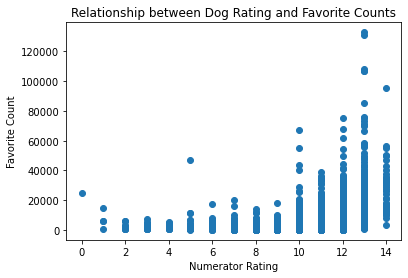

In [66]:
#Below I plot the relationship between rating_numerator and favorite_count
plt.scatter(x=sub_14_rating['rating_numerator'], y=sub_14_rating['favorite_count'])
plt.xlabel('Numerator Rating')
plt.ylabel('Favorite Count')
plt.title('Relationship between Dog Rating and Favorite Counts')

Text(0.5, 1.0, 'Relationship between Dog Rating and Retweet Counts')

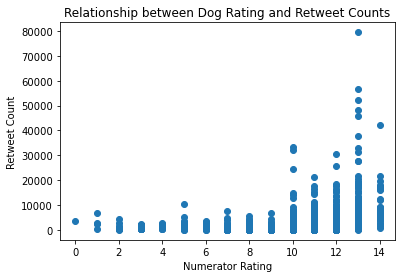

In [67]:
#Below I plot the relationship between rating_numerator and retweet_count
plt.scatter(x=sub_14_rating['rating_numerator'], y=sub_14_rating['retweet_count'])
plt.xlabel('Numerator Rating')
plt.ylabel('Retweet Count')
plt.title('Relationship between Dog Rating and Retweet Counts')

Text(0.5, 1.0, 'Relationship between Favorite Counts and Retweet Counts')

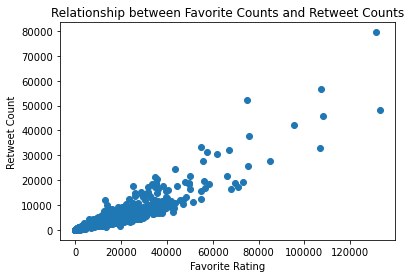

In [68]:
#Below I plot the relationship between favorite_count and retweet_count
plt.scatter(x=sub_14_rating['favorite_count'], y=sub_14_rating['retweet_count'])
plt.xlabel('Favorite Rating')
plt.ylabel('Retweet Count')
plt.title('Relationship between Favorite Counts and Retweet Counts')

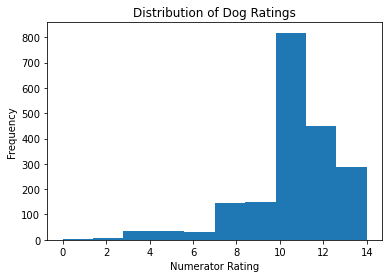

In [69]:
#Below I plot a histogram of dog ratings with the subset of data including rating 14 and below.
plt.hist(x=sub_14_rating['rating_numerator']);
plt.xlabel('Numerator Rating');
plt.ylabel('Frequency');
plt.title('Distribution of Dog Ratings');

### Insights:
1. There is a positive relationship between the dog rating and the likelihood of people 'favoriting' the tweet. In other words, people tend to favorite the tweets of dogs with higher ratings.

2. There is a positive relationship between the dog rating and the likelihood of people 'retweeting' the tweet. In other words, people tend to retweet the tweets of dogs with higher ratings.

3. There is a positive relationship between the likelihood of people 'favoriting' the tweet and the likelihood of people 'retweeting' the tweet. In other words, they may be retweeting they tweets they favorite or favoriting the tweets they reweet.

4. The most frequent rating given is 11. Very few dogs receive a rating below 11.